## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  52.590034   321.816667  0.133252   8.765633  0.474327
1  91.335018  1375.558947  0.143608  10.629017  1.187975
2  31.170199  1527.724585  0.709882   7.857883  1.586226
3  57.065273   968.658452  0.590593   3.496008  1.512517
4  90.889826   208.779721  0.147706   8.973179  0.341304


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9620624	total: 67.1ms	remaining: 1m 7s
1:	learn: 0.9549986	total: 67.7ms	remaining: 33.8s
2:	learn: 0.9470210	total: 68.2ms	remaining: 22.7s
3:	learn: 0.9367654	total: 68.6ms	remaining: 17.1s
4:	learn: 0.9279617	total: 69.1ms	remaining: 13.8s
5:	learn: 0.9198140	total: 69.6ms	remaining: 11.5s
6:	learn: 0.9122535	total: 70ms	remaining: 9.94s
7:	learn: 0.9036829	total: 70.6ms	remaining: 8.76s
8:	learn: 0.8953746	total: 71ms	remaining: 7.82s
9:	learn: 0.8864466	total: 71.4ms	remaining: 7.07s
10:	learn: 0.8791768	total: 71.9ms	remaining: 6.46s
11:	learn: 0.8716216	total: 72.3ms	remaining: 5.95s
12:	learn: 0.8640196	total: 72.7ms	remaining: 5.52s
13:	learn: 0.8572480	total: 73.1ms	remaining: 5.15s
14:	learn: 0.8500456	total: 73.6ms	remaining: 4.83s
15:	learn: 0.8431524	total: 74ms	remaining: 4.55s
16:	learn: 0.8360452	total: 74.4ms	remaining: 4.3s
17:	learn: 0.8282169	total: 74.9ms	remaining: 4.09s
18:	learn: 0.8198942	total: 75.5ms	remaining: 3.9s


98:	learn: 0.4562421	total: 109ms	remaining: 996ms
99:	learn: 0.4529982	total: 110ms	remaining: 988ms
100:	learn: 0.4504244	total: 110ms	remaining: 981ms
101:	learn: 0.4470501	total: 111ms	remaining: 973ms
102:	learn: 0.4440607	total: 111ms	remaining: 966ms
103:	learn: 0.4415052	total: 111ms	remaining: 959ms
104:	learn: 0.4380050	total: 112ms	remaining: 952ms
105:	learn: 0.4357281	total: 112ms	remaining: 946ms
106:	learn: 0.4336195	total: 113ms	remaining: 939ms
107:	learn: 0.4311201	total: 113ms	remaining: 933ms
108:	learn: 0.4285329	total: 113ms	remaining: 925ms
109:	learn: 0.4258571	total: 114ms	remaining: 920ms
110:	learn: 0.4232906	total: 114ms	remaining: 915ms
111:	learn: 0.4206129	total: 115ms	remaining: 909ms
112:	learn: 0.4183657	total: 115ms	remaining: 904ms
113:	learn: 0.4160303	total: 116ms	remaining: 898ms
114:	learn: 0.4135979	total: 116ms	remaining: 893ms
115:	learn: 0.4114477	total: 116ms	remaining: 886ms
116:	learn: 0.4089911	total: 117ms	remaining: 882ms
117:	learn: 0.

276:	learn: 0.2161026	total: 187ms	remaining: 487ms
277:	learn: 0.2158260	total: 187ms	remaining: 486ms
278:	learn: 0.2153778	total: 188ms	remaining: 485ms
279:	learn: 0.2150521	total: 188ms	remaining: 483ms
280:	learn: 0.2147015	total: 189ms	remaining: 482ms
281:	learn: 0.2135612	total: 189ms	remaining: 481ms
282:	learn: 0.2133053	total: 190ms	remaining: 480ms
283:	learn: 0.2123504	total: 190ms	remaining: 479ms
284:	learn: 0.2120633	total: 190ms	remaining: 478ms
285:	learn: 0.2111065	total: 191ms	remaining: 476ms
286:	learn: 0.2107866	total: 191ms	remaining: 475ms
287:	learn: 0.2105027	total: 192ms	remaining: 474ms
288:	learn: 0.2102052	total: 192ms	remaining: 473ms
289:	learn: 0.2099282	total: 192ms	remaining: 471ms
290:	learn: 0.2089177	total: 193ms	remaining: 470ms
291:	learn: 0.2086150	total: 193ms	remaining: 468ms
292:	learn: 0.2083362	total: 194ms	remaining: 467ms
293:	learn: 0.2072469	total: 194ms	remaining: 466ms
294:	learn: 0.2069511	total: 195ms	remaining: 465ms
295:	learn: 

510:	learn: 0.1197664	total: 291ms	remaining: 279ms
511:	learn: 0.1189792	total: 291ms	remaining: 278ms
512:	learn: 0.1183019	total: 292ms	remaining: 277ms
513:	learn: 0.1182417	total: 292ms	remaining: 277ms
514:	learn: 0.1175756	total: 293ms	remaining: 276ms
515:	learn: 0.1174981	total: 293ms	remaining: 275ms
516:	learn: 0.1168427	total: 294ms	remaining: 274ms
517:	learn: 0.1167667	total: 294ms	remaining: 274ms
518:	learn: 0.1161220	total: 295ms	remaining: 273ms
519:	learn: 0.1160474	total: 295ms	remaining: 272ms
520:	learn: 0.1154131	total: 295ms	remaining: 272ms
521:	learn: 0.1153399	total: 296ms	remaining: 271ms
522:	learn: 0.1147159	total: 296ms	remaining: 270ms
523:	learn: 0.1146440	total: 297ms	remaining: 269ms
524:	learn: 0.1140301	total: 297ms	remaining: 269ms
525:	learn: 0.1139595	total: 298ms	remaining: 268ms
526:	learn: 0.1133556	total: 298ms	remaining: 267ms
527:	learn: 0.1132863	total: 298ms	remaining: 267ms
528:	learn: 0.1126922	total: 298ms	remaining: 266ms
529:	learn: 

686:	learn: 0.0750902	total: 368ms	remaining: 168ms
687:	learn: 0.0749297	total: 369ms	remaining: 167ms
688:	learn: 0.0748156	total: 369ms	remaining: 167ms
689:	learn: 0.0745404	total: 370ms	remaining: 166ms
690:	learn: 0.0744274	total: 370ms	remaining: 166ms
691:	learn: 0.0742873	total: 370ms	remaining: 165ms
692:	learn: 0.0739398	total: 371ms	remaining: 164ms
693:	learn: 0.0735137	total: 371ms	remaining: 164ms
694:	learn: 0.0733572	total: 372ms	remaining: 163ms
695:	learn: 0.0732158	total: 372ms	remaining: 163ms
696:	learn: 0.0730748	total: 373ms	remaining: 162ms
697:	learn: 0.0729203	total: 373ms	remaining: 161ms
698:	learn: 0.0728112	total: 373ms	remaining: 161ms
699:	learn: 0.0724731	total: 374ms	remaining: 160ms
700:	learn: 0.0720598	total: 374ms	remaining: 160ms
701:	learn: 0.0719271	total: 375ms	remaining: 159ms
702:	learn: 0.0717757	total: 375ms	remaining: 159ms
703:	learn: 0.0714671	total: 376ms	remaining: 158ms
704:	learn: 0.0712062	total: 376ms	remaining: 157ms
705:	learn: 

925:	learn: 0.0383780	total: 473ms	remaining: 37.8ms
926:	learn: 0.0383060	total: 474ms	remaining: 37.3ms
927:	learn: 0.0382532	total: 474ms	remaining: 36.8ms
928:	learn: 0.0380962	total: 474ms	remaining: 36.2ms
929:	learn: 0.0380091	total: 475ms	remaining: 35.7ms
930:	learn: 0.0379383	total: 475ms	remaining: 35.2ms
931:	learn: 0.0378975	total: 476ms	remaining: 34.7ms
932:	learn: 0.0377444	total: 476ms	remaining: 34.2ms
933:	learn: 0.0376588	total: 477ms	remaining: 33.7ms
934:	learn: 0.0376048	total: 477ms	remaining: 33.1ms
935:	learn: 0.0375352	total: 477ms	remaining: 32.6ms
936:	learn: 0.0374951	total: 477ms	remaining: 32.1ms
937:	learn: 0.0373460	total: 478ms	remaining: 31.6ms
938:	learn: 0.0372480	total: 478ms	remaining: 31.1ms
939:	learn: 0.0371025	total: 479ms	remaining: 30.6ms
940:	learn: 0.0370189	total: 479ms	remaining: 30ms
941:	learn: 0.0369543	total: 480ms	remaining: 29.5ms
942:	learn: 0.0368586	total: 480ms	remaining: 29ms
943:	learn: 0.0367927	total: 480ms	remaining: 28.5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

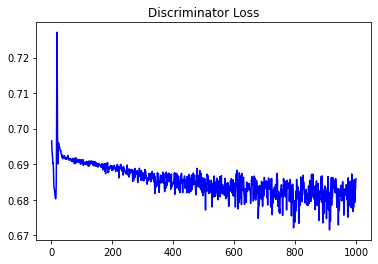

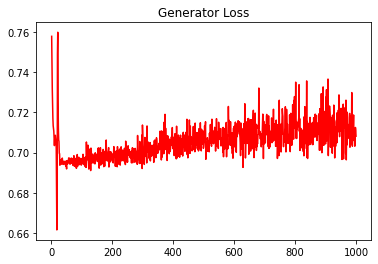

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.25139475011354595


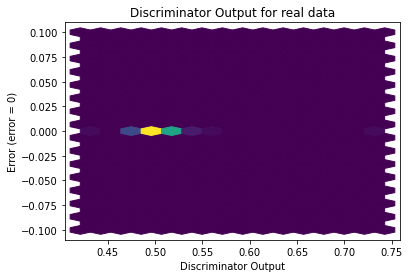

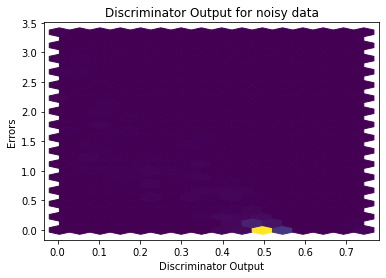

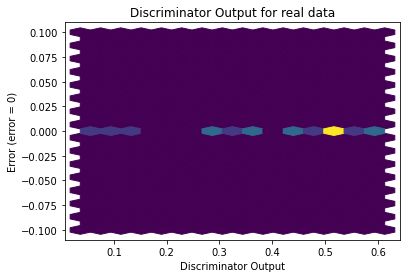

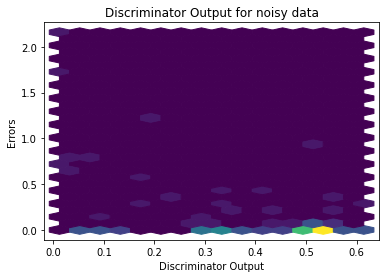

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


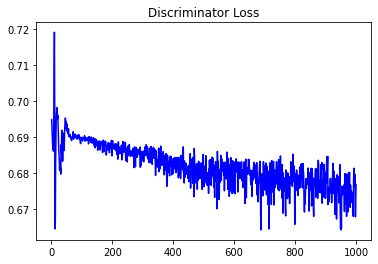

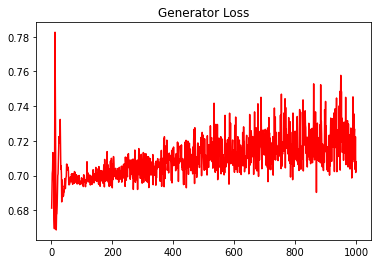

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.22910808205131525


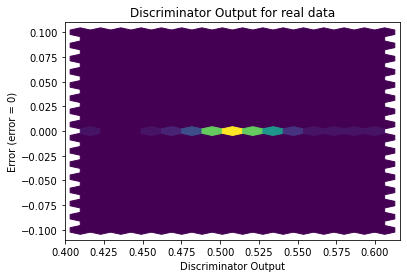

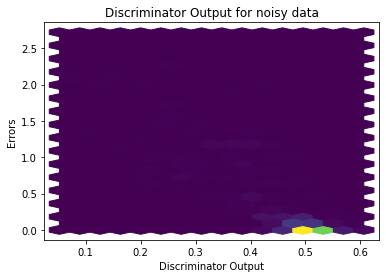

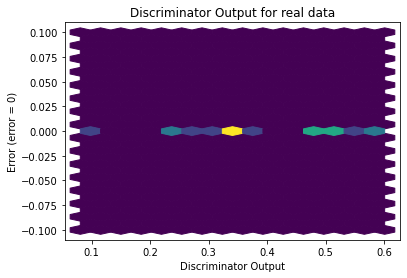

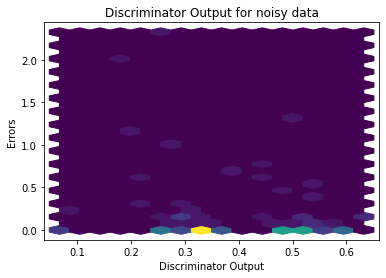

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5936]], requires_grad=True)
